# Clasificación de números escritos a mano

En este _notebook_ vamos a mostrar un ejemplo clásico: clasificar números escritos a mano.

Primero cargamos el _dataset_

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
import numpy as np
from sklearn.linear_model import SGDClassifier

y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Por ejemplo, veamos uno de los números del _dataset_

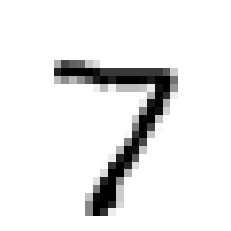

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_test.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

Ahora vamos a entrenar un clasificador con la librería `Scikit Learn`. En este caso usaremos un modelo basado en `Stochastic Gradient Descent` para clasificar. Para entender el funcionamiento del modelo detrás vas a tener que esperar a otros cursos, pero por ahora no te preocupes, vamos a utilizar la magia de las funciones `fit` y `predict`.

In [5]:
from sklearn.linear_model import SGDClassifier

# Ojo, esto puede demorarse un poco
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

Vamos a predecir sobre el número que seleccionamos más arriba.

In [6]:
sgd_clf.predict([some_digit])

array([7], dtype=uint8)

Y ahora vamos a visualizar algo llamado "matriz de confusión", que nos sirve para entender cómo se está equivocando nuestro predictor.

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5751,    1,   28,   12,   18,   18,   32,    0,   37,   26],
       [   4, 6480,   74,   30,   15,   21,    7,    8,   84,   19],
       [  90,   38, 5270,  107,   76,   30,   74,   55,  185,   33],
       [  52,   38,  344, 5140,   26,  148,   30,   57,  140,  156],
       [  22,   33,   51,    6, 5305,   19,   44,   15,   79,  268],
       [ 130,   26,   60,  282,  114, 4190,  115,   15,  349,  140],
       [  63,   14,   80,   12,   46,  111, 5530,    2,   55,    5],
       [  30,   23,  126,   25,   98,   21,    4, 5408,   54,  476],
       [  86,  137,  170,  266,   92,  304,   46,   14, 4446,  290],
       [  39,   25,   43,   91,  214,   53,    2,  131,  118, 5233]])

Ahora lo vamos a pasar a escala de grises. Los números altos van a representar errores. En cada fila tenemos el número real y en la columna las predicciones, por ejemplo de aquí desprendemos que muchos 5s son clasificados como 8s. Es algo que podríamos esperar que pasara.

In [8]:
# Esta celda es para eliminar el ruido que produce la diagonal

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

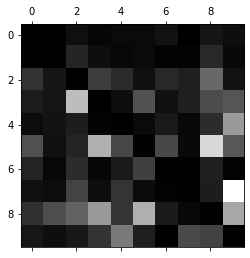

In [9]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()